In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_compl = pd.read_csv("Lending Club/loans_2007.csv")

/Users/yusufcan/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_compl.shape

(42538, 52)

In [3]:
df_compl.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal           

In [4]:
df_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [5]:
# wir elimierniern drei übeltäter die voll mit nans sind in der zeile
rows_delete=df_compl[df_compl["loan_amnt"].isnull()].index

df_compl= df_compl.drop(rows_delete, axis=0)

In [6]:
####################################### Data cleaning
# emp_legth,home_ownership verdummien -> 3_FeatureEngineering_TrainTestSplit.ipynb
# loan_status zu einer neuen kategorievariable machen mit : 0 = gezahlt, 1= ausstehend, 2= nicht in der lage -> siehe 3_FeatureEngineering_TrainTestSplit.ipynb


# die, die wir rausgeschmissen haben, haben wir entweder nicht verstanden oder waren unbalancierte variablen 
columns_useless =["id", "member_id", "pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]

columns_unwanted=["emp_title","title","zip_code", "addr_state","out_prncp","out_prncp_inv","total_pymnt","last_pymnt_amnt","last_pymnt_d","last_credit_pull_d"]

# kann mesch nehmen - muss aber auch nicht
columns_50_50=["delinq_2yrs","earliest_cr_line","inq_last_6mths","pub_rec","revol_util","total_acc"]

# weitere features werden gelöscht aufgrund correlations
columns_corr=["funded_amnt","funded_amnt_inv","total_pymnt_inv"]

# weitere features werden gelöscht, da sie die selben infos tragen bzw. daraus werden unsere anderen variablen bestimmt
columns_sameinfo=["total_rec_int","total_rec_prncp","total_rec_late_fee", "recoveries","collection_recovery_fee"]

# hier wird das y, also unser target bestimmt
y_columns=["loan_status","grade","sub_grade"]

In [7]:
# hier wird das y, also unser target bestimmt
y_target=df_compl[y_columns]

In [8]:
#spalten löschen
df= df_compl.drop(columns_useless, axis=1).drop(columns_corr, axis=1).drop(columns_sameinfo, axis=1).drop(columns_unwanted, axis=1).drop(columns_50_50, axis=1).drop(y_columns, axis=1)

In [9]:
#### Hier werden die dateintypen, welche falsch sind korrigiert
if type(df["int_rate"][0])== type("str"): 
    df["int_rate"]=df["int_rate"].str.strip("%").astype("float")
else:
    print("Already a float")
    
if type(df["term"][0]) == type("str"): 
    df["term"]=df["term"].str.strip("months").astype("float")
else:
    print("Already a float")


In [10]:
#### hier wird eine dateityp zum zeitdatentyp geändert
df["issue_d"]= pd.to_datetime(df["issue_d"])

import datetime

df['issue_d'] = pd.to_datetime(df["issue_d"], format="%Y-%M-%D")
df['issue_d'] = df['issue_d'].map(datetime.datetime.toordinal).astype("float")

In [11]:
#Hier werden fehlende Werte ganz allgemein ersetzt

df["emp_length"].fillna("no info at all", inplace=True)
df["pub_rec_bankruptcies"].fillna(0.0, inplace=True)

(10, 10)


<AxesSubplot:>

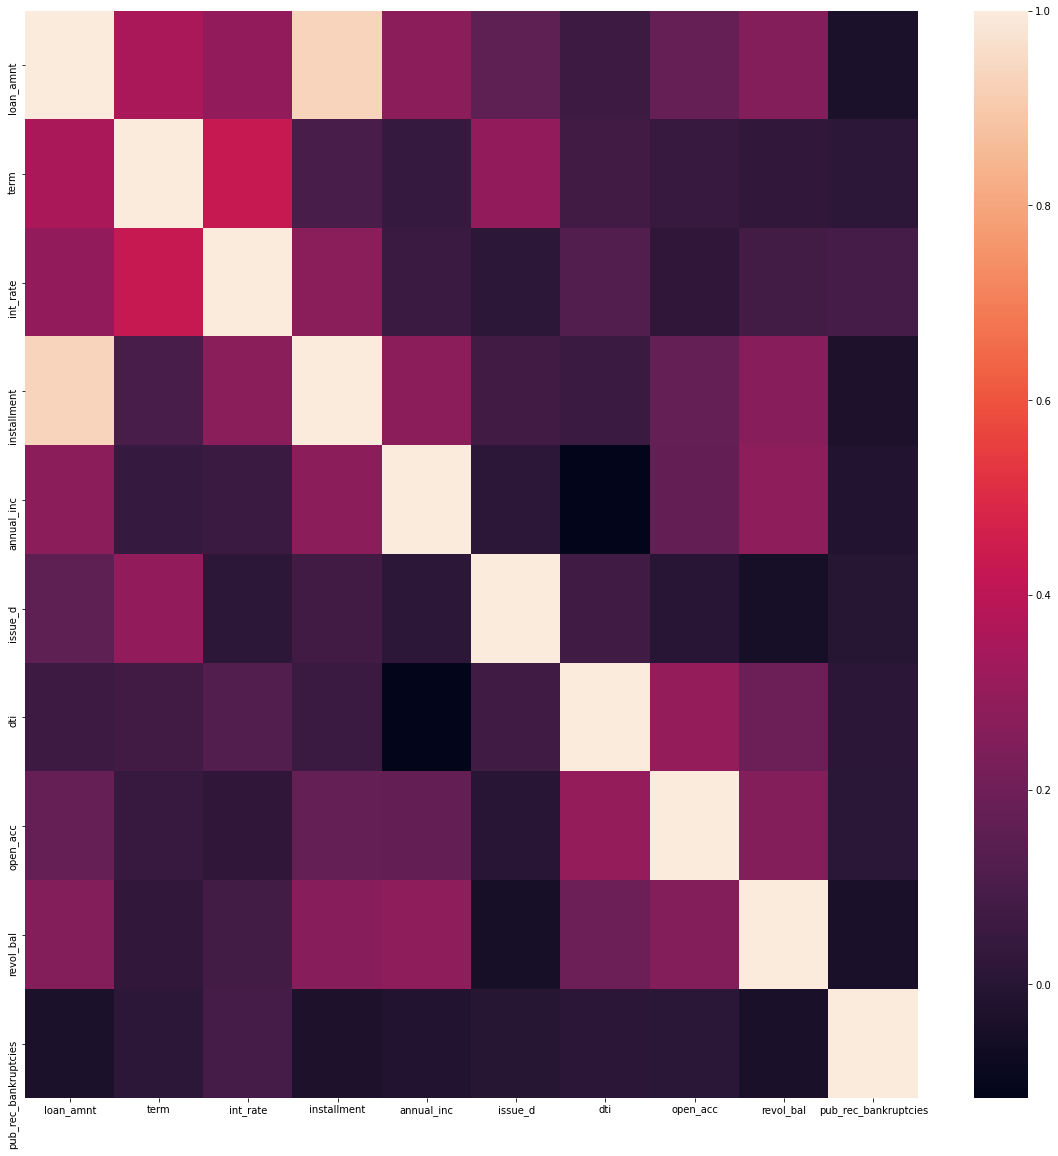

In [12]:
print(df.corr().shape)
fig= plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [13]:
%store df y_target

Stored 'df' (DataFrame)
Stored 'y_target' (DataFrame)
